Taken from https://stackoverflow.com/questions/24382832/audio-spectrum-extraction-from-audio-file-by-python

In [2]:
from scipy.io import wavfile # scipy library to read wav files
import numpy as np

AudioName = "/data/Working/USVtesting/ch1/T0000005.WAV" # Audio File
fs, Audiodata = wavfile.read(AudioName)

<ipython-input-2-ebb259cf6ddd>:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, Audiodata = wavfile.read(AudioName)


In [5]:
Audiodata.shape

(76242944,)

Text(0.5, 1.0, 'Audio signal in time')

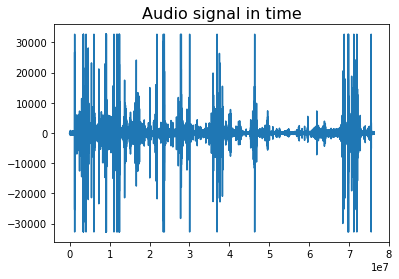

In [6]:
# Plot the audio signal in time
import matplotlib.pyplot as plt
plt.plot(Audiodata)
plt.title('Audio signal in time',size=16)

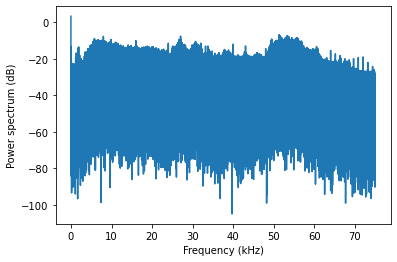

In [7]:
# spectrum
from scipy.fftpack import fft # fourier transform
n = len(Audiodata) 
AudioFreq = fft(Audiodata)
AudioFreq = AudioFreq[0:int(np.ceil((n+1)/2.0))] #Half of the spectrum
MagFreq = np.abs(AudioFreq) # Magnitude
MagFreq = MagFreq / float(n)
# power spectrum
MagFreq = MagFreq**2
if n % 2 > 0: # ffte odd 
    MagFreq[1:len(MagFreq)] = MagFreq[1:len(MagFreq)] * 2
else:# fft even
    MagFreq[1:len(MagFreq) -1] = MagFreq[1:len(MagFreq) - 1] * 2 

plt.figure()
freqAxis = np.arange(0,int(np.ceil((n+1)/2.0)), 1.0) * (fs / n);
plt.plot(freqAxis/1000.0, 10*np.log10(MagFreq)) #Power spectrum
plt.xlabel('Frequency (kHz)'); plt.ylabel('Power spectrum (dB)');

In [37]:
%matplotlib notebook
def plot_spectrogram(f, t, Sxx, type='dB', tmin=None, tmax=None, fmin=None, fmax=None):
    #Spectrogram
    from scipy import signal
    N = 512 #Number of point in the fft
    
    # Set time and frequency min/max to data limits if not specified
    if tmin is None:
        tmin = t.min()
    if tmax is None:
        tmax = t.max()
    if fmin is None:
        fmin = f.min()
    if fmax is None:
        fmax = f.max()
    
    # Filter out unwanted times/frequencies
    tbool = np.bitwise_and(t > tmin, t < tmax)
    fbool = np.bitwise_and(f > fmin, f < fmax)
    t_use = t[tbool]
    f_use = f[fbool]
    Sxx_use = Sxx[fbool, :][:, tbool]
    
    plt.figure()
    if type == 'dB':
        plt.pcolormesh(t_use, f_use,10*np.log10(Sxx_use), shading='auto') # dB spectrogram
    elif type == 'lineal':
        plt.pcolormesh(t_use, f_use, Sxx_use, shading='auto') # Lineal spectrogram
        
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [seg]')
    plt.title('Spectrogram with scipy.signal',size=16);

    plt.show()

In [32]:
tmin, tmax = 0, 100
fmin, fmax = 10000, 60000
tbool = np.bitwise_and(t > tmin, t < tmax)
fbool = np.bitwise_and(f > fmin, f < fmax)
t_use = t[tbool]
f_use = f[fbool]
Sxx[fbool,:][:, tbool].shape

(170, 33482)

In [38]:
from ipywidgets import interact, fixed, IntSlider
plot_type='dB'
f, t, Sxx = signal.spectrogram(Audiodata, fs, window = signal.blackman(N),nfft=N)
interact(plot_spectrogram, f=fixed(f), t=fixed(t), Sxx=fixed(Sxx), 
         tmin=IntSlider(value=0, min=0, max=np.round(t.max() - 1), step=1),
         tmax=IntSlider(value=int(np.round(t.max())), min=1, max=np.round(t.max()), step=1),
         fmin=IntSlider(value=0, min=0, max=int(np.round(f.max(),3)-1000), step=1000),
         fmax=IntSlider(value=int(np.round(f.max(),-3)), min=1000, max=int(np.round(f.max(),-3)), step=1000),
         type=fixed(plot_type))

interactive(children=(IntSlider(value=0, description='tmin', max=507), IntSlider(value=508, description='tmax'…

<function __main__.plot_spectrogram(f, t, Sxx, type='dB', tmin=None, tmax=None, fmin=None, fmax=None)>

<IPython.core.display.Javascript object>


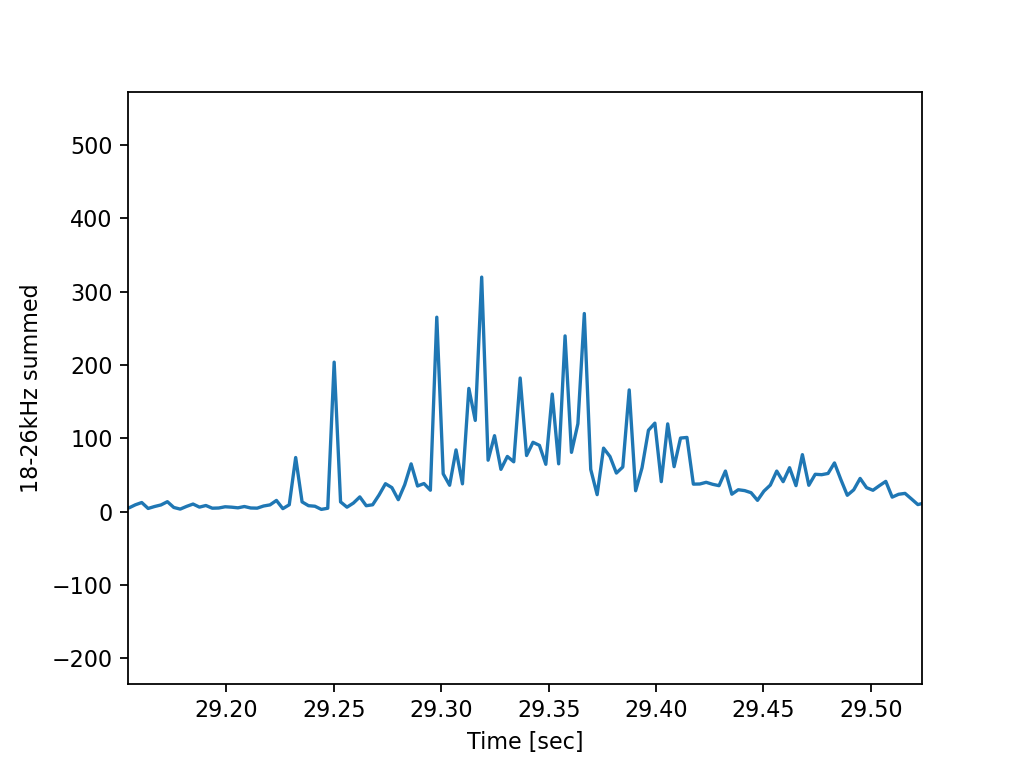

In [19]:
f22bool = np.bitwise_and(f > 18000, f < 26000)
plt.figure()
plt.plot(t, Sxx[f22bool,:].sum(axis=0))
plt.xlabel('Time [sec]')
plt.ylabel('18-26kHz summed')
plt.show()